# Week 4 - k-means clustering

In this lab we'll implement the k-means algorithm.

This notebook shows solutions using **numpy arrays**. (Exercise descriptions, docstrings etc all still describe the solution using lists and tuples.) Using numpy arrays requires a bit of extra knowledge compared to the main solutions notebook. However numpy is extremely useful for scientific programming in Python. 

In these solutions we're passing arrays around instead of lists of tuples. So our example data becomes:

In [10]:
import numpy as np

In [6]:
# Five two-dimensional points
example_data_2d = [(2,3),(5,3.4),(1.3,0.2),(3.1,3),(2.2,4)]
example_data_2d = np.array(example_data_2d)

# Five three-dimensional points
example_data_3d = [(2,3,1.2),(5,3.4,4),(1.3,0.2,5.2),(3.1,3,3),(2.2,4,2)]
example_data_3d = np.array(example_data_3d)

In [7]:
example_data_2d

array([[ 2. ,  3. ],
       [ 5. ,  3.4],
       [ 1.3,  0.2],
       [ 3.1,  3. ],
       [ 2.2,  4. ]])

In [8]:
example_data_3d

array([[ 2. ,  3. ,  1.2],
       [ 5. ,  3.4,  4. ],
       [ 1.3,  0.2,  5.2],
       [ 3.1,  3. ,  3. ],
       [ 2.2,  4. ,  2. ]])

In [11]:
# Just like Python lists, arrays are zero-indexed
# First coordinate ("x coordinate") of the third point:
example_data_2d[2,0]

1.3

In [12]:
# 5 points, 2 dimensions
example_data_2d.shape

(5, 2)

These algorithms can be written more efficiently using numpy arrays. All the hints are set up to assume that you will write your functions using lists of tuples, but if you're experienced with Python, you can try using numpy arrays instead. Numpy implements vectorised maths and so it will be faster to run, and in many cases more concise to write.

In [9]:
% matplotlib inline
import matplotlib.pyplot as plt

## Data 

We'll use 2D data points so it's easy to visualise our results. This code generates some "real" clusters probabilistically, and a smattering of random points all over the space.

In [13]:
# cluster 3 is a little more widely spread than clusters 1 and 2

# cluster1 is centred at (1,1) and has standard deviation 0.2, and 20 points
cluster1 = np.random.randn(20,2)*0.2+np.array([[1,1]])
cluster2 = np.random.randn(20,2)*0.3+np.array([[2,1]])
cluster3 = np.random.randn(20,2)*0.2+np.array([[1.5,2]])
background = np.random.uniform(low=[0,0],high=[3,3],size=(30,2))

In [14]:
points = np.concatenate([cluster1,cluster2,cluster3,background])
# We'll represent the points as a list of tuples
#points = [tuple(p) for p in points_array]
# Show the first five
print(points[:5])

[[ 0.92861439  1.1449852 ]
 [ 1.19387549  0.7846904 ]
 [ 1.0396265   1.18812744]
 [ 1.02491086  0.99236857]
 [ 1.10591285  0.84523391]]


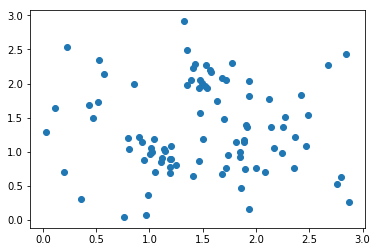

In [15]:
# Plot the points
# points[:,0] will retrieve all points (:), but only the first (x) coordinate (0)

plt.scatter(points[:,0], points[:,1])

## K-means 

The function to initialise centroids is provided for you. This function returns a list of k centroids, randomly placed. Notice that it is completely random - we could improve this function by trying to space the centroids far apart from one another.

In [16]:
# Now takes in data as numpy array, and returns centroids as numpy array
def initialise_centroids(data, k):
    """
    Place centroids randomly into range of data of arbitrary dimension.
    Takes a list of N data points.
    Returns a list of k centroids, each of which will be a tuple of the same
    dimensionality as the data points.
    """
    d = data.shape[1]
    arr = np.array(data)
    minvals = np.min(data,axis=0)
    maxvals = np.max(data,axis=0)
    centroids = np.random.uniform(low=minvals,high=maxvals,size=(k,d))
    return centroids

**Exercise 1:**

Complete the function `assign_points()`. Given a list of k centroids and a list of N points, find which is the closest centroid to each point. Your function should return a list of N integers. Each integer should be a number from 0 to k-1, corresponding to the closest centroid for that point.

In [17]:
# This function is provided for you. It calculates Euclidean distance between two points.
from kmeans_utilities import euclidean_distance
print(euclidean_distance((1,1),(3,3)))

2.82842712475


In [20]:
# Now takes in centroids and data as numpy arrays of shape (k,d) and (N,d),
# and returns an array of length N specifying the closest centroids

def assign_points(centroids, data):
    """
    Assign each point to its closest centroid.
    Takes in a list of k centroids and a list of N data points.
    Should return a list of N ints, each a number from 0 to k-1,
    representing the index of the closest cluster.
    """
    # subtract distances, square, sum along d-dimension, square root. gives array k by d
    # use numpy broadcasting to make dimensions of both arrays match [centroid,point,dimension] (i.e. [k,N,d])
    vectors_data_to_centroids = centroids[:,np.newaxis,:] - data[np.newaxis,:,:]
    # square then sum over the dimension axis to get Euclidean distance
    # the resulting array all_distances is of shape (k,d)
    all_distances = np.sqrt(np.sum(vectors_data_to_centroids**2,axis=2))
    # for each point, pick minimum distance centroid. argmin gives the index of the minumum value
    closest_centroids = np.argmin(all_distances, axis=0)
    return closest_centroids

In [21]:
# Should return [0, 1, 0, 1, 1]
example_centroids = np.array([(2,2),(4,4)])
assign_points(example_centroids, example_data_2d)

array([0, 1, 0, 1, 1])

In [22]:
# Should return [1, 0, 1, 1, 1]
example_centroids = np.array([(5,2,0),(3,1,1)])
assign_points(example_centroids, example_data_3d)

array([1, 0, 1, 1, 1])

**Exercise 2:**

Complete the function `calculate_mean_centroids()`. This function should take in the list of data points, the list of assignments to clusters, and k, and return the a list of centroids.

The function `points_average()` is provided for you. Given a list of points, it finds the mean. You need to pass it the correct points for each cluster.

In [27]:
# This function is provided for you

# Notice we now use average_point_array not average_point - this is the
# same but returns a 1D array instead of a tuple to represent the coordinate

from kmeans_utilities import average_point_array

In [28]:
# Data and assignments should now both be arrays, and centroids returned
# will be an array with shape (k,d)
# This solution isn't much more vectorised than the non-array version, 
# as we still have to iterate over clusters

def calculate_mean_centroids(data, assignments, k):
    """
    Take data of shape (N,d) and assignments of shape (N) and
    return centroids array of shape (k,d).
    """
    assert np.max(assignments) < k
    centroid_list = [average_point_array(data[assignments==c,:]) for c in range(k)]
    centroids = np.concatenate([centroid[np.newaxis,:] for centroid in centroid_list])
    return centroids


In [30]:
# Should return centroids [( 1.65,  1.6 ), (3.43333333,  3.46666667)]
calculate_mean_centroids(example_data_2d, np.array([0, 1, 0, 1, 1]), 2)

array([[ 1.65      ,  1.6       ],
       [ 3.43333333,  3.46666667]])

In [31]:
# Should return centroids [(5, 3.34, 4), (2.15,2.55,2.85)]
calculate_mean_centroids(example_data_3d, np.array([1, 0, 1, 1, 1]), 2)

array([[ 5.  ,  3.4 ,  4.  ],
       [ 2.15,  2.55,  2.85]])

**Exercise 3:**

Complete the `kmeans()` function to carry out k-means clustering. You can use the functions you created in the first two exercises. You only need to fill in the missing lines in the iterative loop.

In [47]:
# Instead of importing plot_kmeans, here's a version that uses arrays 

def plot_kmeans(data, centroids, assignments, k):
    for cluster in range(k):
        cluster_points = data[assignments==cluster, :]
        plt.scatter(cluster_points[:,0],cluster_points[:,1])
    # draw centroids
    plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=80,c='k')
    plt.show()

In [35]:
# Input data should now be an array of shape (N,d) representing the points

# We no longer need the points_equal function to make the code more readable 
# - it's pretty easy to calculate if all points are equal with numpy subtraction

def kmeans(data, k):
    """
    Implement k-means clustering on a given set of points.
    data should be a list of N points, where each point is a tuple.
    Returns a tuple of (centroids, cluster_assignments)
    where 
    centroids is a list of centroid points, and each centroid is a tuple
    cluster_assignments a list of N numbers representing cluster assignments,
     where each number is between 0 and k-1.
    """
    epsilon = 0.001
    N, d = data.shape
    centroids = initialise_centroids(data, k)
    cluster_assignments = assign_points(centroids, data)
    old_centroids = centroids - 1 # ensure not equal at start
    # This uses subtraction of entire arrays (via numpy)
    # to check that all centroid coordinates match previous values
    while not np.all(centroids - old_centroids < epsilon):
        old_centroids = centroids
        centroids = calculate_mean_centroids(data, cluster_assignments, k)
        cluster_assignments = assign_points(centroids, data)
    return (centroids, cluster_assignments)

In [36]:
# Answer can be random depending on random initialisation. 
# Likely solutions are:
# centroids [(1.3,0.2),(3.075,3.35)]
# cluster assignments [1, 1, 0, 1, 1] or [0, 0, 1, 0, 0]
#  OR
# centroids [(2.1,3.5),(3.1333,2.2)]
# cluster assignments [0, 1, 1, 1, 0] or [1, 0, 0, 0, 1]
#  OR
# centroids [(5,3.4),(2.15,2.55)]
# cluster assignments [1, 0, 1, 1, 1] or [0, 1, 0, 0, 0]

kmeans(example_data_2d,2)

(array([[ 1.3  ,  0.2  ],
        [ 3.075,  3.35 ]]), array([1, 1, 0, 1, 1]))

Now test on the 2D data we created at the top of the notebook:

In [37]:
k = 3
centroids, assignments = kmeans(points, k)
print(centroids)
print(assignments)

[[ 0.9052757   0.94465108]
 [ 1.51522242  2.12672629]
 [ 2.09518476  1.00673772]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 0 1 0 0 2 1 0 2 2 2 2 2 1 0
 1 0 1 2 1 0 1 0 1 0 0 2 0 1 0 2]


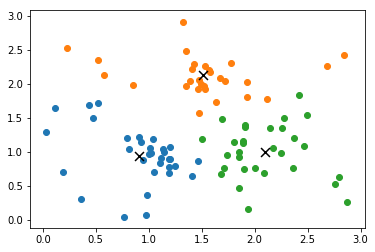

In [48]:
plot_kmeans(points, centroids, assignments, k)